In [4]:
#Default routine
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Pauli
import pennylane as qml
from pennylane.pauli import string_to_pauli_word, pauli_word_to_matrix
from paulicompsoser import pauli_composer as pc


In [9]:
import os
import sys
#module_path = os.path.abspath(os.path.join('..\\..'))
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)
from opttrot import pauli_mani as pm

/Users/hyunseongkim/Dropbox/main/Projects/OptTrot


In [11]:
pstring = "YXI"
pm.PauliUtils.pstr_to_xz_code(pstring)

(6, 4)

In [12]:
bin(4)

'0b100'

In [13]:
bin(6)

'0b110'

In [12]:
# PauliComposer test
pc_val = pc.PauliComposer(pstring)
pc_val.to_matrix()

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],
      dtype=complex64)

In [6]:
pauli_test = pm.Pauli.from_string("XIXIZY")
pauli_test

Pauli(xz=(41, 3), string=XIXIZY, n=6, coef=1)

In [7]:
%%timeit
mat_o =  pauli_test.to_matrix() #naive tensor product

259 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [8]:
coef1 , qml_pauli = pauli_test.to_pennylane()
print(qml_pauli)

Y(0) @ Z(1) @ I(2) @ X(3) @ I(4) @ X(5)


In [9]:
%%timeit
mat_p=  pauli_word_to_matrix(qml_pauli) #naive tensor product

417 µs ± 4.38 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
mat_o=  pauli_test.to_matrix()
mat_o

array([[ 0.+0.j,  0.-0.j,  0.+0.j, ...,  0.-0.j,  0.+0.j,  0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.-0.j, -0.+0.j, ...,  0.-0.j, -0.+0.j,  0.+0.j],
       ...,
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.-0.j, -0.+0.j, ...,  0.-0.j, -0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -0.+0.j, ...,  0.+0.j, -0.+0.j, -0.+0.j]])

In [11]:
mat_p=  qml.pauli.pauli_word_to_matrix(qml_pauli)
mat_p

array([[ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
       ...,
       [ 0.+0.j,  0.+0.j,  0.+0.j, ..., -0.+0.j, -0.+0.j, -0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ..., -0.+0.j, -0.+0.j, -0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ..., -0.+0.j, -0.+0.j, -0.+0.j]])

In [12]:
from qiskit.quantum_info import Pauli as qiskit_Pauli

In [13]:
xnum = 43
znum= 3
n = 6
x_array = np.flip(np.array([int(b) for b in format(xnum, f"0{n}b")], dtype=np.uint))
z_array = np.flip(np.array([int(b) for b in format(znum, f"0{n}b")], dtype=np.uint))

In [14]:
x_array

array([1, 1, 0, 1, 0, 1], dtype=uint32)

In [15]:
z_array

array([1, 1, 0, 0, 0, 0], dtype=uint32)

In [16]:
qiskit_p = qiskit_Pauli("XIXIZY")
qiskit_p

Pauli('XIXIZY')

In [17]:
qiskit_Pauli((z_array, x_array))

Pauli('XIXIYY')

In [18]:
x, z = pm.PauliUtils.pstr_to_xz_code("XIXIZY")

In [19]:
qiskit_p.z, qiskit_p.x

(array([ True,  True, False, False, False, False]),
 array([ True, False, False,  True, False,  True]))

In [20]:
bin(x), bin(z)

('0b101001', '0b11')

In [21]:
coef1 , qiskit_pauli = pauli_test.to_qiskit()
qiskit_pauli

Pauli('XIXIZY')

In [22]:
%%timeit
qiskit_pauli.to_matrix() # Paulicomposer

101 µs ± 2.89 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Random matrix test

In [26]:
import timeit
import numba

In [27]:
times = []
times_single = []

In [18]:
times = []
for i in range(2, 10):
    print("qubits:", i)
    QUBITS = i
    ndim = 2**QUBITS
    #H = np.random.random((ndim, ndim)).astype(complex) + 1j*np.random.random((ndim, ndim)).astype(complex)
    #pauli_poly = pm.PauliPoly.from_matrix(H)
    H = np.ones((ndim, ndim)).astype(complex) - 1j*np.ones((ndim, ndim)).astype(complex)
    pauli_poly = pm.PauliPoly.from_coef_mat(H)
    
    penny_sentence = pauli_poly.to_pennylane(except_zero=False)
    coefs, qiskit_paulis = pauli_poly.to_qiskit()

    st1 = timeit.default_timer()
    
    pauli_poly.to_matrix()
    
    st2 = timeit.default_timer()

    mat_naive = np.zeros((ndim, ndim), dtype=complex)
    
    for pauli in pauli_poly.poly:
        mat_naive += pauli.to_matrix()
    
    st3 = timeit.default_timer()
    
    p_dict = penny_sentence.items()
    mat_base = np.zeros((ndim, ndim), dtype=complex)

    for p, coef in p_dict:
        mat_base += coef* qml.pauli.pauli_word_to_matrix(p)

    st4 = timeit.default_timer()
    
    mat_base_q = np.zeros((ndim, ndim), dtype=complex)
    for p, coef in zip(qiskit_paulis, coefs):
        mat_base_q += coef* p.to_matrix()
    
    st5 = timeit.default_timer()

    times.append((st2-st1, st3-st2, st4-st3, st5-st4))
    print(f"P:\t{st2-st1}\nNaive:\t{st3-st2}\nPenny:\t{st4-st3}\nQiskit:\t{st5-st4}")

qubits: 2
P:	0.000358999939635396
Naive:	0.0008184000616893172
Penny:	0.12678119994234294
Qiskit:	0.00163569999858737
qubits: 3
P:	0.0009371000342071056
Naive:	0.005537200020626187
Penny:	0.01325149997137487
Qiskit:	0.005500399973243475
qubits: 4
P:	0.00482120004016906
Naive:	0.036387500003911555
Penny:	0.0671353000216186
Qiskit:	0.021566899958997965
qubits: 5
P:	0.04757020005490631
Naive:	0.22018459998071194
Penny:	0.38613470003474504
Qiskit:	0.1068106999155134
qubits: 6
P:	0.48512029997073114
Naive:	1.2094105000142008
Penny:	2.0326656999532133
Qiskit:	0.473699799971655
qubits: 7
P:	7.347337799961679
Naive:	8.68821890000254
Penny:	13.016359100001864
Qiskit:	2.460378000047058
qubits: 8


KeyboardInterrupt: 

In [30]:
times

[(0.0006419999990612268,
  0.0009104999480769038,
  0.5045434000203386,
  0.001928800018504262),
 (0.0015449999482370913,
  0.0055047000059857965,
  0.012479300028644502,
  0.0055896000121720135),
 (0.005912899971008301,
  0.03338240005541593,
  0.06291069998405874,
  0.023253499995917082),
 (0.023184599995147437,
  0.1841625000233762,
  0.32703179999953136,
  0.08902880002278835),
 (0.09591630002250895,
  1.0710207999800332,
  1.7694086999981664,
  0.4037053000065498),
 (0.47098490002099425,
  7.453431900008582,
  10.783837299968582,
  2.1230741000035778),
 (3.3533135000034235,
  95.11142329999711,
  135.15168389998144,
  50.27134069998283),
 (38.83907809993252,
  1457.6312760000583,
  1641.7560629999498,
  16378.934776800103)]

In [31]:
times_arr=  np.array(times).T

In [32]:
times_arr

array([[6.41999999e-04, 1.54499995e-03, 5.91289997e-03, 2.31846000e-02,
        9.59163000e-02, 4.70984900e-01, 3.35331350e+00, 3.88390781e+01],
       [9.10499948e-04, 5.50470001e-03, 3.33824001e-02, 1.84162500e-01,
        1.07102080e+00, 7.45343190e+00, 9.51114233e+01, 1.45763128e+03],
       [5.04543400e-01, 1.24793000e-02, 6.29107000e-02, 3.27031800e-01,
        1.76940870e+00, 1.07838373e+01, 1.35151684e+02, 1.64175606e+03],
       [1.92880002e-03, 5.58960001e-03, 2.32535000e-02, 8.90288000e-02,
        4.03705300e-01, 2.12307410e+00, 5.02713407e+01, 1.63789348e+04]])

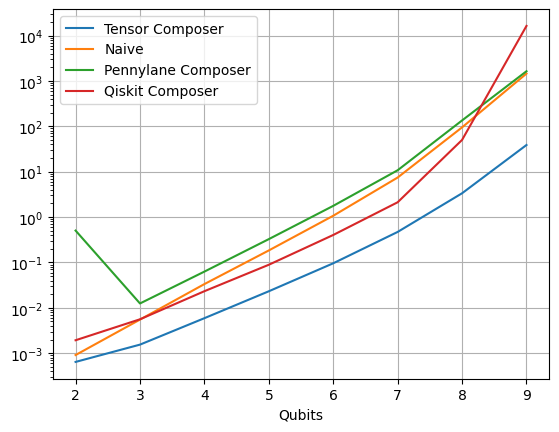

In [33]:
plt.plot(range(2, 10), times_arr[0], label="Tensor Composer")
plt.plot(range(2, 10), times_arr[1], label="Naive")
plt.plot(range(2, 10), times_arr[2], label="Pennylane Composer")
plt.plot(range(2, 10), times_arr[3], label="Qiskit Composer")
plt.legend()
plt.xlabel("Qubits")
plt.yscale("log")
plt.grid()
plt.set_title("")

In [35]:
#np.save("te_nai_pen_qis_worst_2_10.npy", times_arr)

In [36]:
times_arr = np.load("te_nai_pen_qis_worst_2_10.npy")

In [37]:
times_arr

array([[6.41999999e-04, 1.54499995e-03, 5.91289997e-03, 2.31846000e-02,
        9.59163000e-02, 4.70984900e-01, 3.35331350e+00, 3.88390781e+01],
       [9.10499948e-04, 5.50470001e-03, 3.33824001e-02, 1.84162500e-01,
        1.07102080e+00, 7.45343190e+00, 9.51114233e+01, 1.45763128e+03],
       [5.04543400e-01, 1.24793000e-02, 6.29107000e-02, 3.27031800e-01,
        1.76940870e+00, 1.07838373e+01, 1.35151684e+02, 1.64175606e+03],
       [1.92880002e-03, 5.58960001e-03, 2.32535000e-02, 8.90288000e-02,
        4.03705300e-01, 2.12307410e+00, 5.02713407e+01, 1.63789348e+04]])

## Test for the all routines

In [4]:
#Default routine
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Pauli, PauliList
import pennylane as qml
from pennylane.pauli import string_to_pauli_word, pauli_word_to_matrix
from paulicompsoser import pauli_composer as pc
import os
import sys
module_path = os.path.abspath(os.path.join('..\\..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from opttrot import pauli_mani as pm
import timeit

In [5]:
def naive(pauli_poly):
    mat= np.zeros((ndim, ndim), dtype=complex)
    # Naive tensor
    for pauli in pauli_poly.poly:
        mat += pauli.to_matrix()
    return mat
def pennylane_naive(p_dict):
    mat = np.zeros((ndim, ndim), dtype=complex)
    for p, coef in p_dict:
        mat += coef* qml.pauli.pauli_word_to_matrix(p)
    return mat
def qiskit_composer(coefs, qiskit_paulis):
    mat = np.zeros((ndim, ndim), dtype=complex)
    for p, coef in zip(qiskit_paulis, coefs):
        mat += coef* p.to_matrix()
    return mat
def qiskit_composer_list(qiskit_list):
    paulimats = qiskit_list.to_matrix(array=True)
    mat = np.zeros((ndim, ndim), dtype=complex)
    for coef, p in zip(coefs, paulimats):
        mat += coef*p 
    return mat
def pauli_composer(pauli_poly):
    p_composers = [pc.PauliComposer(p.string, p.coef) for p in pauli_poly.poly]
    mat = np.zeros((ndim, ndim), dtype=complex)
    for p in p_composers:
        mat += p.to_matrix()
    return mat

In [7]:
# Worst case
times = []
nmax = 3
for i in range(1, nmax):
    print("----------------------------------------------")
    print("Qubits:", i)
    print("----------------------------------------------")
    QUBITS = i
    ndim = 2**QUBITS
    
    # Random matrix
    #H = np.random.random((ndim, ndim)).astype(complex) + 1j*np.random.random((ndim, ndim)).astype(complex)
    # Full matrix
    H = np.ones((ndim, ndim)).astype(complex) - 1j*np.ones((ndim, ndim)).astype(complex)
    
    
    pauli_poly = pm.PauliPoly.from_coef_mat(H)
    penny_sentence = pauli_poly.to_pennylane(except_zero=False)
    p_dict = penny_sentence.items()
    
    coefs, qiskit_paulis = pauli_poly.to_qiskit()
    qiskit_list = PauliList(qiskit_paulis)
    qiskit_coefs = np.array(coefs)
    
    #-------------------------------------------------------------------------------------
    st = [] 
    st.append(timeit.default_timer())
    # Inverse Tensor
    pauli_poly.to_matrix()
    st.append(timeit.default_timer())
    print("Inverse Tesnor:\t\t\t{}".format(st[1]-st[0]))
    pauli_poly.to_matrix(no_jit=True)
    st.append(timeit.default_timer())
    print("Inverse Tesnor non_opt:\t\t{}".format(st[2]-st[1]))
    naive(pauli_poly)
    st.append(timeit.default_timer())
    print("Naive Tesnor:\t\t\t{}".format(     st[3]-st[2]))
    # Pennylane naive tensor
    pennylane_naive(p_dict)
    st.append(timeit.default_timer())
    print("Pennylane:\t\t\t{}".format(        st[4]-st[3]))
    # Qiskit
    qiskit_composer(coefs, qiskit_paulis)
    st.append(timeit.default_timer())
    print("Qiskit:\t\t\t\t{}".format(         st[5]-st[4]))
    # Pauli Composer
    pauli_composer(pauli_poly)
    st.append(timeit.default_timer())
    print("PauliCom:\t\t\t{}".format(         st[6]-st[5]))
    # jit no opt
    pauli_poly.to_matrix(no_collector=True)
    st.append(timeit.default_timer())
    print("No collector:\t\t\t{}".format(      st[7]-st[6]))
    # jit no opt
    pauli_poly.to_matrix(no_jit=True, no_collector=True)
    st.append(timeit.default_timer())
    print("No collector no jit:\t\t{}".format(      st[8]-st[7]))
    
    times.append([st[i+1] - st[i] for i in range(0,len(st)-1)])

----------------------------------------------
Qubits: 1
----------------------------------------------
Inverse Tesnor:			0.00020130000484641641
Inverse Tesnor non_opt:		9.010000212583691e-05
Naive Tesnor:			4.0399987483397126e-05
Pennylane:			8.05000017862767e-05
Qiskit:				0.0004275999963283539
PauliCom:			0.000814300001366064
No collector:			0.00016730000788811594
No collector no jit:		9.750000026542693e-05
----------------------------------------------
Qubits: 2
----------------------------------------------
Inverse Tesnor:			0.0005621999880531803
Inverse Tesnor non_opt:		0.0002717000024858862
Naive Tesnor:			0.0009587000095052645
Pennylane:			0.0023427999985869974
Qiskit:				0.0016368999931728467
PauliCom:			0.002957300006528385
No collector:			0.0004907999973511323
No collector no jit:		0.0003046000056201592


In [8]:
times_arr=  np.array(times).T
np.save("worts_case.npy",times_arr)

In [25]:
times_arr = np.load("worts_case.npy")

Text(0.5, 1.0, 'Worst case')

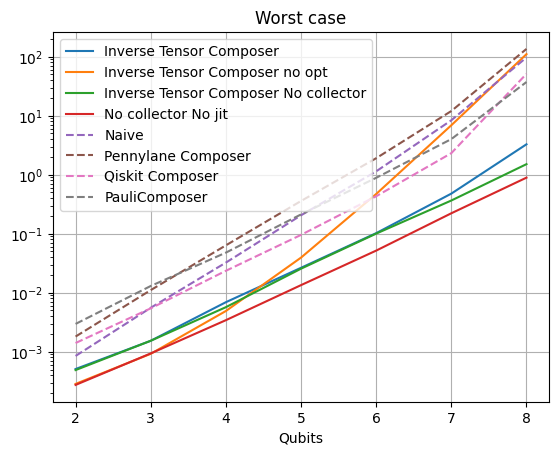

In [26]:
xline = [int(i) for i in range(2, times_arr.shape[0]+1)]

plt.plot(xline, times_arr[0], label="Inverse Tensor Composer")
plt.plot(xline, times_arr[1], label="Inverse Tensor Composer no opt")
plt.plot(xline, times_arr[6], label="Inverse Tensor Composer No collector")
plt.plot(xline, times_arr[7], label="No collector No jit")

plt.plot(xline, times_arr[2], linestyle="--", label="Naive")
plt.plot(xline, times_arr[3], linestyle="--", label="Pennylane Composer")
plt.plot(xline, times_arr[4], linestyle="--", label="Qiskit Composer")
plt.plot(xline, times_arr[5], linestyle="--", label="PauliComposer")



plt.legend()
plt.xlabel("Qubits")
plt.yscale("log")
plt.grid()
plt.title("Worst case")

# Generate Estimation

In [18]:
!pip install tqdm

  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)


In [24]:
!pip install ipywidgets

  Using cached ipywidgets-8.1.2-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.10-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.10-py3-none-any.whl.metadata (4.1 kB)
Using cached ipywidgets-8.1.2-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.10-py3-none-any.whl (215 kB)
Using cached widgetsnbextension-4.0.10-py3-none-any.whl (2.3 MB)


In [1]:
#Default routine
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Pauli, PauliList
import pennylane as qml
from pennylane.pauli import string_to_pauli_word, pauli_word_to_matrix
from paulicompsoser import pauli_composer as pc
import os
import sys
module_path = os.path.abspath(os.path.join('..\\..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from opttrot import pauli_mani as pm
import timeit

from tqdm.notebook import tqdm

In [9]:
def naive(pauli_poly, ndim):
    mat= np.zeros((ndim, ndim), dtype=complex)
    # Naive tensor
    for pauli in pauli_poly.poly:
        mat += pauli.to_matrix()
    return mat
def pennylane_naive(p_dict, ndim):
    mat = np.zeros((ndim, ndim), dtype=complex)
    for p, coef in p_dict:
        mat += coef* qml.pauli.pauli_word_to_matrix(p)
    return mat
def qiskit_composer(coefs, qiskit_paulis, ndim):
    mat = np.zeros((ndim, ndim), dtype=complex)
    for p, coef in zip(qiskit_paulis, coefs):
        mat += coef* p.to_matrix()
    return mat
def qiskit_composer_list(qiskit_list, ndim):
    paulimats = qiskit_list.to_matrix(array=True)
    mat = np.zeros((ndim, ndim), dtype=complex)
    for coef, p in zip(coefs, paulimats):
        mat += coef*p 
    return mat
def pauli_composer(pauli_poly, ndim):
    p_composers = [pc.PauliComposer(p.string, p.coef) for p in pauli_poly.poly]
    mat = np.zeros((ndim, ndim), dtype=complex)
    for p in p_composers:
        mat += p.to_matrix()
    return mat

In [14]:
def calculate_estimation(percentage, pbar):
    times = []
    print("====================================")
    print("Percentages {}".format(percentage))
    for i in range(1, nmax):
        print("Qubits:", i, ":")
        print("----------------------------------------------")
        QUBITS = i
        ndim = 2**QUBITS

        # Random matrix
        #H = np.random.random((ndim, ndim)).astype(complex) + 1j*np.random.random((ndim, ndim)).astype(complex)
        # Full matrix
        H = np.zeros((ndim, ndim)).astype(complex)

        nums = int(ndim*ndim*percentage)
        nums = 1 if nums ==0 else nums
        pindex = np.random.choice(ndim, size=(nums, 2))
        coef_h = np.random.random(nums)

        for e,(i,j) in enumerate(pindex):
            H[i, j] = coef_h[e]

        pauli_poly = pm.PauliPoly.from_coef_mat(H)
        penny_sentence = pauli_poly.to_pennylane(except_zero=False)
        p_dict = penny_sentence.items()

        coefs, qiskit_paulis = pauli_poly.to_qiskit()
        #qiskit_list = PauliList(qiskit_paulis)
        #qiskit_coefs = np.array(coefs)

        #-------------------------------------------------------------------------------------
        st = [] 
        st.append(timeit.default_timer())
        # Inverse Tensor
        pauli_poly.to_matrix()
        st.append(timeit.default_timer())
        print("Inverse Tesnor(jit):\t\t{}".format(st[1]-st[0]))
        
        print("=", end="")
        pbar.update(10)
        
        pauli_poly.to_matrix(no_jit=True)
        st.append(timeit.default_timer())
        #print("Inverse Tesnor:\t\t\t{}".format(st[2]-st[1]))
        
        print("=", end="")
        pbar.update(10)
        
        naive(pauli_poly, ndim)
        st.append(timeit.default_timer())
        #print("Naive Tesnor:\t\t\t{}".format(     st[3]-st[2]))
        
        print("=", end="")
        pbar.update(10)
        
        # Pennylane naive tensor
        pennylane_naive(p_dict, ndim)
        st.append(timeit.default_timer())
        #print("Pennylane:\t\t\t{}".format(        st[4]-st[3]))
        
        print("=", end="")
        pbar.update(10)
        
        # Qiskit
        qiskit_composer(coefs, qiskit_paulis, ndim)
        st.append(timeit.default_timer())
        #print("Qiskit:\t\t\t\t{}".format(         st[5]-st[4]))
        
        print("=", end="")
        pbar.update(10)
        
        # Pauli Composer
        pauli_composer(pauli_poly, ndim)
        st.append(timeit.default_timer())
        #print("PauliCom:\t\t\t{}".format(         st[6]-st[5]))
        
        print("=", end="")
        pbar.update(10)
        
        # jit no opt
        pauli_poly.to_matrix(no_collector=True)
        st.append(timeit.default_timer())
        #print("IT:No collector(jit):\t\t{}".format(      st[7]-st[6]))
        
        print("=", end="")
        pbar.update(10)
        
        # jit no opt
        pauli_poly.to_matrix(no_jit=True, no_collector=True)
        st.append(timeit.default_timer())
        #print("IT:No collector:\t\t{}".format(      st[8]-st[7]))
        
        print("=", end="")
        pbar.update(10)
        
        print(f"|{i}")
        times.append([st[i+1] - st[i] for i in range(0,len(st)-1)])
    return times

In [59]:
nmax = 10
#percentages= [0.2, 0.4, 0.6, 0.8, 1]
percentages= [0.2]
for percentage in tqdm(percentages, desc="Total systems"):
    with tqdm(total=4500, desc="Total") as pbar:
        for i in tqdm(range(5), desc="Iteration"):
            times = calculate_estimation(percentage, pbar)
            times_arr=  np.array(times).T
            sim_record_name = f"{int(percentage*100)}percent_term_{i}.npy"
            np.save(sim_record_name,times_arr)

Total systems:   0%|          | 0/1 [00:00<?, ?it/s]

Total:   0%|          | 0/4500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/5 [00:00<?, ?it/s]

Percentages 0.2
Qubits: 1
----------------------------------------------
Inverse Tesnor(jit):		0.00014449999434873462
Inverse Tesnor:			7.380003808066249e-05
Naive Tesnor:			3.5299977753311396e-05
Pennylane:			4.650000482797623e-05
Qiskit:				0.0001639999682083726
PauliCom:			0.0003457000129856169
IT:No collector(jit):		0.00010790000669658184
IT:No collector:		0.00010110001312568784
Qubits: 2
----------------------------------------------
Inverse Tesnor(jit):		0.00013930001296103
Inverse Tesnor:			0.00011319998884573579
Naive Tesnor:			0.00019799999427050352
Pennylane:			0.0003741000546142459
Qiskit:				0.0004120999947190285
PauliCom:			0.0008857999928295612
IT:No collector(jit):		0.00021679996279999614
IT:No collector:		0.00028660002863034606
Qubits: 3
----------------------------------------------
Inverse Tesnor(jit):		0.0003304000128991902
Inverse Tesnor:			0.00042349996510893106
Naive Tesnor:			0.0009778000530786812
Pennylane:			0.001886499987449497
Qiskit:				0.0011690999963320792

# Data plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {}
percentages= [0.2, 0.4, 0.6, 0.8, 1]
for p in percentages:
    pst = str(p)
    data[pst] = []
    for i in range(5):
        st = f"{int(p*100)}percent_term_{i}.npy"
        data[pst].append(np.load(st))
    data[pst] = np.array(data[pst])

In [3]:
w_points={
    "0.2": {
        0:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        1:{
            1: [0, 1],
            2: [0, 1],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        2:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        3:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        4:{
            1: [0, 1, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        5:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        6:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        7:{
            1: [0, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3],
            6: [0, 1, 2, 3],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        }
    },
    "0.4": {
        0:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        1:{
            1: [0, 1],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        2:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        3:{
            1: [0, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        4:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        5:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        6:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        7:{
            1: [0, 1, 2, 3, 4],
            2: [1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
    },
    "0.6": {
        0:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        1:{
            1: [0, 1],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        2:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        3:{
            1: [0, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        4:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        5:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3]
        },
        6:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        7:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        }
    },
    "0.8": {
        0:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        1:{
            1: [0],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        2:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        3:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        4:{
            1: [0, 1, 2, 3, 4],
            2: [ 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        5:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        6:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        7:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        }
    },
    "1": {
        0:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        1:{
            1: [0, 1],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        2:{
            1: [0, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        3:{
            1: [0, 1, 2, 3],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        4:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        5:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        6:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        },
        7:{
            1: [0, 1, 2, 3, 4],
            2: [0, 1, 2, 3, 4],
            3: [0, 1, 2, 3, 4],
            4: [0, 1, 2, 3, 4],
            5: [0, 1, 2, 3, 4],
            6: [0, 1, 2, 3, 4],
            7: [0, 1, 2, 3, 4],
            8: [0, 1, 2, 3, 4],
            9: [0, 1, 2, 3, 4]
        }
    },
}

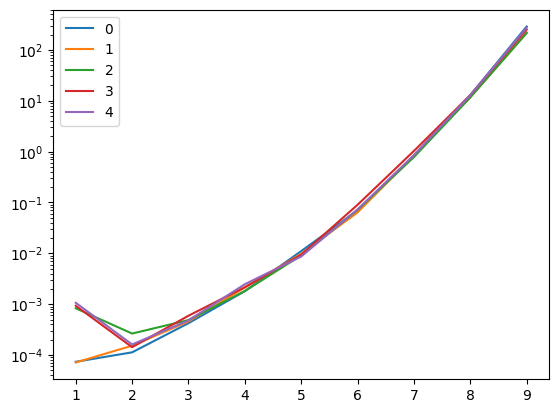

In [11]:
qubits = range(1, 10, 1)
for i, d in enumerate(data["0.2"]):
    plt.plot(qubits, d[1], label=f"{i}")
plt.yscale("log")
plt.legend()

In [13]:
data["0.2"].shape # 5: samples, 8: methods, 9: qubits

(5, 8, 9)

In [4]:
labels = [
    "Effect Terms(jit)",
    "Effect Terms",
    "Tensor Product",
    "Pennylane",
    "Qiskit",
    "PauliComposer",
    "Naive(jit)",
    "Naive",
]

In [36]:
percentages

[0.2, 0.4, 0.6, 0.8, 1]

In [52]:
# Test the std errors and see the abnormal datas
qubits = range(1, 10, 1)
final_plot = {}
for index in [0, 1, 2, 3, 4]:
    pstr = str(percentages[index])
    print(index, pstr)
    plt_data = data[pstr]
    w_ps = w_points[pstr]

    data_plot = {}
    print(pstr, " ==============================")
    for key in w_ps.keys(): #8 methods
        data_plot[key] = [[], []]
        print(key, ":", labels[key])
        qubit_active = w_ps[key] 
        for i in range(1, 10): # 9 qubits
            effective_index = qubit_active[i] # 1-5 active samples
            qdata = []
            for j in effective_index: #5: samples
                #5: samples, 8: methods, 9: qubits
                #print(j, key, f"qubit:{i}", plt_data[j][key][i-1])
                qdata.append(plt_data[j][key][i-1])
            qdata_np = np.array(qdata)
    
            avg = qdata_np.mean()
            std = qdata_np.std()
            print( f"qubit:{i}" , avg, "+-",std)
            data_plot[key][0].append(avg)
            data_plot[key][1].append(std)
            print("-----")
    final_plot[pstr] = data_plot


0 0.2
0.2  ==============================
0 : Effect Terms(jit)
qubit:1 0.00013797999126836659 +- 1.9353691351674804e-05
-----
qubit:2 0.00015237501065712422 +- 1.8132612884694024e-05
-----
qubit:3 0.00035458001075312496 +- 2.339678243682626e-05
-----
qubit:4 0.0015702399890869857 +- 0.0002786618228272918
-----
qubit:5 0.00426645998377353 +- 0.00012181693429711858
-----
qubit:6 0.019720759999472648 +- 0.0016437788229202834
-----
qubit:7 0.0951910600066185 +- 0.013485755942697247
-----
qubit:8 0.4792726199957542 +- 0.016835974687393507
-----
qubit:9 4.083918100013397 +- 0.16737555824149922
-----
1 : Effect Terms
qubit:1 7.265002932399511e-05 +- 1.1500087566673756e-06
-----
qubit:2 0.00013299999409355223 +- 1.9800005247816443e-05
-----
qubit:3 0.0004888599854893982 +- 5.681332912878829e-05
-----
qubit:4 0.0020737600163556634 +- 0.0002470802233439651
-----
qubit:5 0.009605000005103647 +- 0.0008148777284304357
-----
qubit:6 0.07369622001424432 +- 0.008767459596716898
-----
qubit:7 0.867384

In [53]:
plt_data.shape #5: samples, 8: methods, 9: qubits
#w_ps # 8:methods, 9:qubits, 5: samples effective

(5, 8, 9)

In [54]:
final_plot

{'0.2': {0: [[0.00013797999126836659,
    0.00015237501065712422,
    0.00035458001075312496,
    0.0015702399890869857,
    0.00426645998377353,
    0.019720759999472648,
    0.0951910600066185,
    0.4792726199957542,
    4.083918100013397],
   [1.9353691351674804e-05,
    1.8132612884694024e-05,
    2.339678243682626e-05,
    0.0002786618228272918,
    0.00012181693429711858,
    0.0016437788229202834,
    0.013485755942697247,
    0.016835974687393507,
    0.16737555824149922]],
  1: [[7.265002932399511e-05,
    0.00013299999409355223,
    0.0004888599854893982,
    0.0020737600163556634,
    0.009605000005103647,
    0.07369622001424432,
    0.8673842799849808,
    12.40117840002058,
    248.73952527999646],
   [1.1500087566673756e-06,
    1.9800005247816443e-05,
    5.681332912878829e-05,
    0.0002470802233439651,
    0.0008148777284304357,
    0.008767459596716898,
    0.08494212967783558,
    0.587833696114109,
    28.857519908536187]],
  2: [[3.967999946326017e-05,
    0.0001

In [39]:
final_plot["0.2"]

{0: [[0.00013797999126836659,
   0.00015237501065712422,
   0.00035458001075312496,
   0.0015702399890869857,
   0.00426645998377353,
   0.019720759999472648,
   0.0951910600066185,
   0.4792726199957542,
   4.083918100013397],
  [1.9353691351674804e-05,
   1.8132612884694024e-05,
   2.339678243682626e-05,
   0.0002786618228272918,
   0.00012181693429711858,
   0.0016437788229202834,
   0.013485755942697247,
   0.016835974687393507,
   0.16737555824149922]],
 1: [[7.265002932399511e-05,
   0.00013299999409355223,
   0.0004888599854893982,
   0.0020737600163556634,
   0.009605000005103647,
   0.07369622001424432,
   0.8673842799849808,
   12.40117840002058,
   248.73952527999646],
  [1.1500087566673756e-06,
   1.9800005247816443e-05,
   5.681332912878829e-05,
   0.0002470802233439651,
   0.0008148777284304357,
   0.008767459596716898,
   0.08494212967783558,
   0.587833696114109,
   28.857519908536187]],
 2: [[3.967999946326017e-05,
   0.00018291999585926533,
   0.0010273200110532343,
 

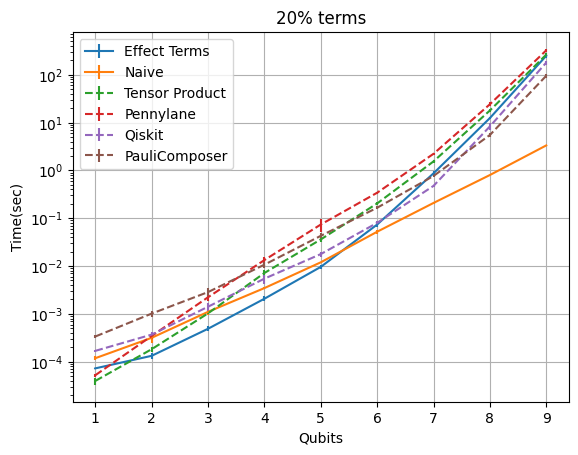

In [77]:
mean_data = []
std_data = []
index = 0
pstr = str(labels[index])
t = str(percentages[index])
per = int(percentages[index]*100)
for i in range(0, 8):
    m, s = final_plot[t][i]
    mean_data.append(m)
    std_data.append(s) 
#plt.errorbar(qubits, y = mean_data[0], yerr=std_data[0], label= labels[0])
plt.errorbar(qubits, y = mean_data[1], yerr=std_data[1], label= labels[1])
plt.errorbar(qubits, y = mean_data[7], yerr=std_data[7], label= labels[7])

plt.errorbar(qubits, y = mean_data[2], yerr=std_data[2], label= labels[2], linestyle="--")
plt.errorbar(qubits, y = mean_data[3], yerr=std_data[3], label= labels[3], linestyle="--")
plt.errorbar(qubits, y = mean_data[4], yerr=std_data[4], label= labels[4], linestyle="--")
plt.errorbar(qubits, y = mean_data[5], yerr=std_data[5], label= labels[5], linestyle="--")
#plt.errorbar(qubits, y = mean_data[6], yerr=std_data[6], label= labels[6])

plt.grid()
plt.legend()
plt.yscale("log")

plt.xlabel("Qubits")
plt.ylabel("Time(sec)")
plt.title(f"{per}% terms")
plt.savefig(f"{t}_terms.pdf", backend="pdf")

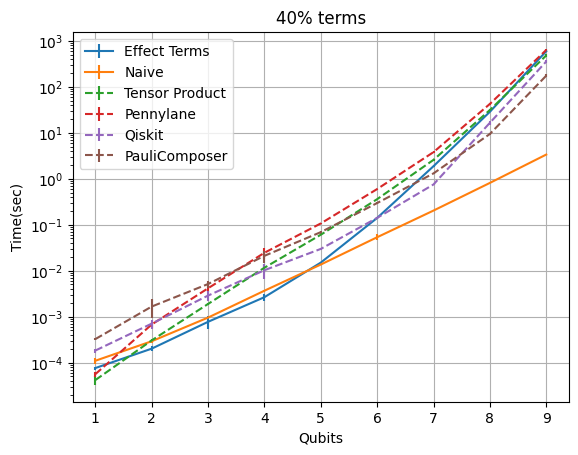

In [78]:
mean_data = []
std_data = []
index = 1
t = str(percentages[index])
per = int(percentages[index]*100)
for i in range(0, 8):
    m, s = final_plot[t][i]
    mean_data.append(m)
    std_data.append(s) 
#plt.errorbar(qubits, y = mean_data[0], yerr=std_data[0], label= labels[0])
plt.errorbar(qubits, y = mean_data[1], yerr=std_data[1], label= labels[1])
plt.errorbar(qubits, y = mean_data[7], yerr=std_data[7], label= labels[7])

plt.errorbar(qubits, y = mean_data[2], yerr=std_data[2], label= labels[2], linestyle="--")
plt.errorbar(qubits, y = mean_data[3], yerr=std_data[3], label= labels[3], linestyle="--")
plt.errorbar(qubits, y = mean_data[4], yerr=std_data[4], label= labels[4], linestyle="--")
plt.errorbar(qubits, y = mean_data[5], yerr=std_data[5], label= labels[5], linestyle="--")
#plt.errorbar(qubits, y = mean_data[6], yerr=std_data[6], label= labels[6])

plt.grid()
plt.legend()
plt.yscale("log")

plt.xlabel("Qubits")
plt.ylabel("Time(sec)")
plt.title(f"{per}% terms")
plt.savefig(f"{t}_terms.pdf", backend="pdf")

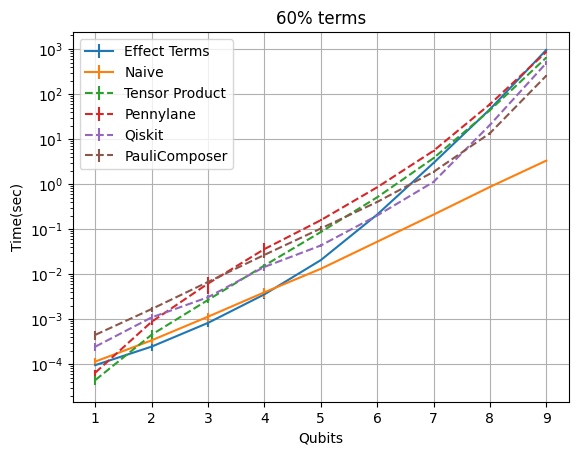

In [79]:
mean_data = []
std_data = []
index = 2
t = str(percentages[index])
per = int(percentages[index]*100)
for i in range(0, 8):
    m, s = final_plot[t][i]
    mean_data.append(m)
    std_data.append(s) 
#plt.errorbar(qubits, y = mean_data[0], yerr=std_data[0], label= labels[0])
plt.errorbar(qubits, y = mean_data[1], yerr=std_data[1], label= labels[1])
plt.errorbar(qubits, y = mean_data[7], yerr=std_data[7], label= labels[7])

plt.errorbar(qubits, y = mean_data[2], yerr=std_data[2], label= labels[2], linestyle="--")
plt.errorbar(qubits, y = mean_data[3], yerr=std_data[3], label= labels[3], linestyle="--")
plt.errorbar(qubits, y = mean_data[4], yerr=std_data[4], label= labels[4], linestyle="--")
plt.errorbar(qubits, y = mean_data[5], yerr=std_data[5], label= labels[5], linestyle="--")
#plt.errorbar(qubits, y = mean_data[6], yerr=std_data[6], label= labels[6])
plt.grid()
plt.legend()
plt.yscale("log")

plt.xlabel("Qubits")
plt.ylabel("Time(sec)")
plt.title(f"{per}% terms")
plt.savefig(f"{t}_terms.pdf", backend="pdf")

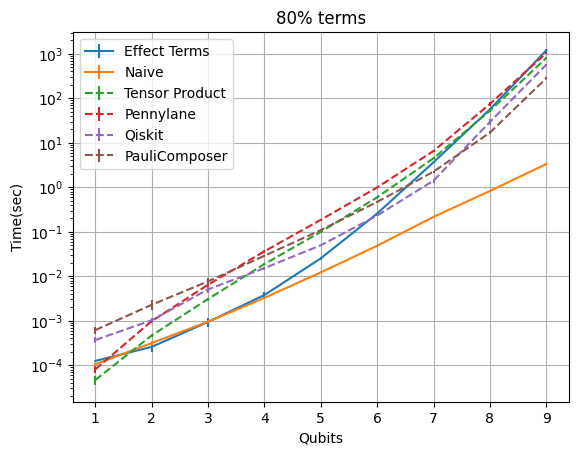

In [80]:
mean_data = []
std_data = []
index = 3
t = str(percentages[index])
per = int(percentages[index]*100)
for i in range(0, 8):
    m, s = final_plot[t][i]
    mean_data.append(m)
    std_data.append(s) 
#plt.errorbar(qubits, y = mean_data[0], yerr=std_data[0], label= labels[0])
plt.errorbar(qubits, y = mean_data[1], yerr=std_data[1], label= labels[1])
plt.errorbar(qubits, y = mean_data[7], yerr=std_data[7], label= labels[7])

plt.errorbar(qubits, y = mean_data[2], yerr=std_data[2], label= labels[2], linestyle="--")
plt.errorbar(qubits, y = mean_data[3], yerr=std_data[3], label= labels[3], linestyle="--")
plt.errorbar(qubits, y = mean_data[4], yerr=std_data[4], label= labels[4], linestyle="--")
plt.errorbar(qubits, y = mean_data[5], yerr=std_data[5], label= labels[5], linestyle="--")
#plt.errorbar(qubits, y = mean_data[6], yerr=std_data[6], label= labels[6])
plt.grid()
plt.legend()
plt.yscale("log")

plt.xlabel("Qubits")
plt.ylabel("Time(sec)")
plt.title(f"{per}% terms")
plt.savefig(f"{t}_terms.pdf", backend="pdf")

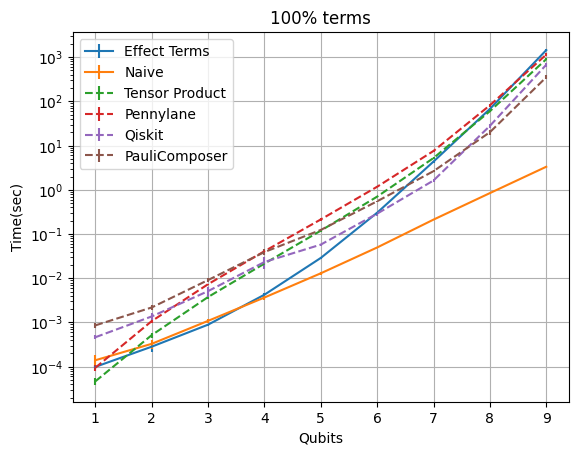

In [81]:
mean_data = []
std_data = []
index = 4
t = str(percentages[index])
per = int(percentages[index]*100)
for i in range(0, 8):
    m, s = final_plot[t][i]
    mean_data.append(m)
    std_data.append(s) 
#plt.errorbar(qubits, y = mean_data[0], yerr=std_data[0], label= labels[0])
plt.errorbar(qubits, y = mean_data[1], yerr=std_data[1], label= labels[1])
plt.errorbar(qubits, y = mean_data[7], yerr=std_data[7], label= labels[7])

plt.errorbar(qubits, y = mean_data[2], yerr=std_data[2], label= labels[2], linestyle="--")
plt.errorbar(qubits, y = mean_data[3], yerr=std_data[3], label= labels[3], linestyle="--")
plt.errorbar(qubits, y = mean_data[4], yerr=std_data[4], label= labels[4], linestyle="--")
plt.errorbar(qubits, y = mean_data[5], yerr=std_data[5], label= labels[5], linestyle="--")
#plt.errorbar(qubits, y = mean_data[6], yerr=std_data[6], label= labels[6])
plt.grid()
plt.legend()
plt.yscale("log")

plt.xlabel("Qubits")
plt.ylabel("Time(sec)")
plt.title(f"{per}% terms")
plt.savefig(f"{t}_terms.pdf", backend="pdf")

# Composition comparsion

From $n=3$ to $n=50$, do
* Single terms: Single terms, diagonal, and random single terms
* Random terms: Random choice of 
* Worst terms: Every coefficients are non-zero for $2^n$ terms.

In [ ]:
n = 4
single_pauli_terms = 
random_length_coefficient_terms =
worst_case_terms = 

In [ ]:
# single pauli terms

#implemented routine direct, without the chasing unnessassary terms

# Add essential calculation routine.

# Qiskit

# Pennylane

In [ ]:
# Decomposition routine

In [ ]:
# Composition routine

In [1]:
from itertools import combinations

In [3]:
for i in combinations([1,2,3,4], 2):
    print(i)

(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)


In [9]:
d = ((1, 14), (2, 13), (3, 1), (6, 4),(7, 4),(7, 5),(13, 9),(14, 10))

In [10]:
new_d = d
for i in range(0, 4):
    tem_l = []
    for r, c in new_d:
        td = (r>>1, c>>1)
        if td not in tem_l:
            tem_l.append(td)
    print(tem_l)
    dup = 0
    for i, j in tem_l:
        n, o = i%2, j%2
        print((i+1-2*(n), j+ 1-(2*(o))), " ", end="")
        if (n, o) in tem_l:
            
    print("\n==================")
    new_d = tem_l

[(0, 7), (1, 6), (1, 0), (3, 2), (6, 4), (7, 5)]
(1, 6)  (0, 7)  (0, 1)  (2, 3)  (7, 5)  (6, 4)  
[(0, 3), (0, 0), (1, 1), (3, 2)]
(1, 2)  (1, 1)  (0, 0)  (2, 3)  
[(0, 1), (0, 0), (1, 1)]
(1, 0)  (1, 1)  (0, 0)  
[(0, 0)]
(1, 1)  


In [11]:
!pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

In [12]:
!pip show scipy

Name: scipy
Version: 1.13.0
Summary: Fundamental algorithms for scientific computing in Python
Home-page: https://scipy.org/
Author: 
Author-email: 
License: Copyright (c) 2001-2002 Enthought, Inc. 2003-2024, SciPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions
are met:

1. Redistributions of source code must retain the above copyright
   notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above
   copyright notice, this list of conditions and the following
   disclaimer in the documentation and/or other materials provided
   with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived
   from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRI

In [13]:
!pip show qiskit

Name: qiskit
Version: 1.0.2
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: 
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: C:\Users\cmat411a\anaconda3\envs\QC\Lib\site-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: 


In [14]:
!pip show pennylane

Name: PennyLane
Version: 0.35.1
Summary: PennyLane is a cross-platform Python library for quantum computing, quantum machine learning, and quantum chemistry. Train a quantum computer the same way as a neural network.
Home-page: https://github.com/PennyLaneAI/pennylane
Author: 
Author-email: 
License: Apache License 2.0
Location: C:\Users\cmat411a\anaconda3\envs\QC\Lib\site-packages
Requires: appdirs, autograd, autoray, cachetools, networkx, numpy, pennylane-lightning, requests, rustworkx, scipy, semantic-version, toml, typing-extensions
Required-by: PennyLane_Lightning


In [1]:
17**2

289

In [3]:
import math
def k(n):
    l = math.sqrt(289*(4**(n+1)-2**(n+2) +1) + n*8**n) - 17*(2**(n+1)-1)
    return l/(2*n)

In [14]:
for i in range(1, 20):
    ki = int(k(i))
    e2n = 4**i
    print(ki, "\t", 100*ki/e2n)

0 	 0.0
0 	 0.0
0 	 0.0
1 	 0.390625
7 	 0.68359375
28 	 0.68359375
103 	 0.628662109375
362 	 0.5523681640625
1192 	 0.4547119140625
3725 	 0.3552436828613281
11161 	 0.2660989761352539
32477 	 0.19357800483703613
92665 	 0.1380816102027893
261054 	 0.09725019335746765
729535 	 0.06794324144721031
2028676 	 0.04723379388451576
5624958 	 0.03274156479164958
15572068 	 0.022660341346636415
43079408 	 0.01567219733260572


In [4]:
k(3)

0.4990309968337196

In [5]:
k(5)

7.39371161771287

In [6]:
k(4)

1.9152325191468833

In [7]:
k(10)

3725.4842556195845

In [8]:
k(4)

1.9152325191468833

In [9]:
k(6)

28.15224886641124